## Ensemble
In dit notebook wordt een Ensemble model gefit op de metadata zonder tekst. In het script preprocessing_2022.ipynb zijn verschillende csv bestanden gemaakt die verschillende groepen metadata bevatten. In dit script worden deze afzonderlijke csv's gebruikt om te kijken hoe de prestaties onderling verschillen. 

Vervolgens worden de csv's uit feature_selection.ipynb gebruikt om mee te vergelijken. 

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


#### 1. all metadata

In [40]:

all_data = pd.read_csv('../../data/cleaned_data/all_columns.csv')
# should only contain metadata columns, texts are not part of them
all_data = all_data.drop(['Unnamed: 0', 'full_text', 'user_description', 'username'], axis = 1)

In [41]:
    # select x and y from data
    y = all_data.pop('real_fake_grade')
    x = all_data

    # scale variables
    x = StandardScaler().fit_transform(x)

In [42]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [43]:
estimator = []
estimator.append(('SVM', SVC(kernel='rbf', C=1, probability=True)))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=15, weights='distance')))
estimator.append(('RFC', RandomForestClassifier(min_samples_split=10, criterion='entropy')))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %",score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %",score)


Hard Voting Score % 0.7381404174573055
Soft Voting Score % 0.734977862112587


#### 2. Tweet_data_columns

In [45]:
tweet_data = pd.read_csv('../../data/cleaned_data/tweet_data_columns.csv')
tweet_data = tweet_data.drop('Unnamed: 0', axis = 1)

In [46]:
y = tweet_data.pop('real_fake_grade')
x = tweet_data

# scale variables
x = StandardScaler().fit_transform(x)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [48]:
estimator = []
estimator.append(('SVM', SVC(kernel='rbf', C=2, probability=True)))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=15, weights='distance')))
estimator.append(('RFC', RandomForestClassifier(min_samples_split=20, criterion='gini')))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %",score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %",score)


Hard Voting Score % 0.6527514231499051
Soft Voting Score % 0.6571790006325111


#### 3. User_data_columns

In [6]:
user_data = pd.read_csv('../../data/cleaned_data/user_data_columns.csv')
user_data = user_data.drop('Unnamed: 0', axis = 1)
# select x and y from data
y = user_data.pop('real_fake_grade')
x = user_data

# scale variables
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [7]:
estimator = []
estimator.append(('SVM', SVC(kernel='rbf', C=1, probability=True)))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=15, weights='distance')))
estimator.append(('RFC', RandomForestClassifier(min_samples_split=10, criterion='entropy')))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %",score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %",score)

Hard Voting Score % 0.7141049968374447
Soft Voting Score % 0.7141049968374447


## Resultaten op data met feature selection

De datasets die hieronder gebruikt worden zijn afkomstig van het script feature_selection.ipynb.

#### All data selected

In [11]:
all_data_selected = pd.read_csv('../../data/selected_data/all_data_selected.csv')
all_data_selected = all_data_selected.drop([ 'Unnamed: 0', 'full_text', 'user_description', 'username'], axis = 1)
# select x and y from data
y = all_data_selected.pop('real_fake_grade')
x = all_data_selected

# scale variables
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [13]:
estimator = []
estimator.append(('SVM', SVC(kernel='rbf', C=1, probability=True)))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=15, weights='distance')))
estimator.append(('RFC', RandomForestClassifier(min_samples_split=10, criterion='entropy')))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %",score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %",score)


Hard Voting Score % 0.7330803289057558
Soft Voting Score % 0.7394054395951929


#### Tweet data selected

In [14]:
tweet_data_selected = pd.read_csv('../../data/selected_data/tweet_data_selected.csv')
tweet_data_selected = tweet_data_selected.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
y = tweet_data_selected.pop('real_fake_grade')
x = tweet_data_selected
x = StandardScaler().fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [15]:
estimator = []
estimator.append(('SVM', SVC(kernel='rbf', C=2, probability=True)))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=15, weights='distance')))
estimator.append(('RFC', RandomForestClassifier(min_samples_split=20, criterion='gini')))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %",score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %",score)

Hard Voting Score % 0.6388361796331435
Soft Voting Score % 0.6388361796331435


#### User data selected

In [16]:
user_data_selected = pd.read_csv('../../data/selected_data/user_data_selected.csv')
user_data_selected = user_data_selected.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
# select x and y from data
y = user_data_selected.pop('real_fake_grade')
x = user_data_selected
x = StandardScaler().fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [17]:
estimator = []
estimator.append(('SVM', SVC(kernel='rbf', C=1, probability=True)))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=15, weights='distance')))
estimator.append(('RFC', RandomForestClassifier(min_samples_split=10, criterion='entropy')))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %",score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %",score)

Hard Voting Score % 0.713472485768501
Soft Voting Score % 0.724225173940544


#### ploting

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

import warnings

warnings.filterwarnings('ignore')

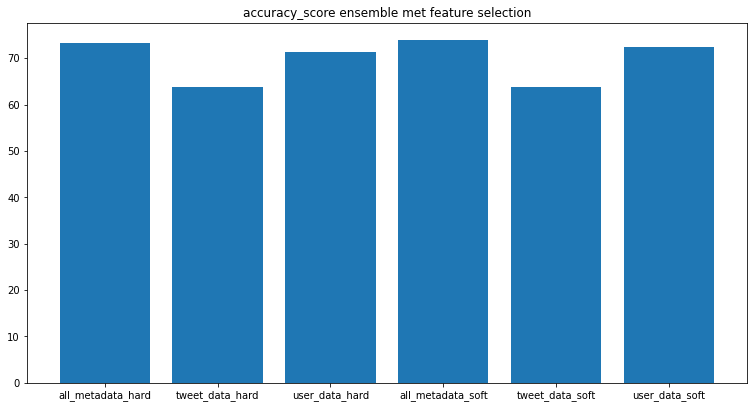

In [41]:
sns.color_palette()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
data_sets = ['all_metadata_hard', 'tweet_data_hard', 'user_data_hard','all_metadata_soft', 'tweet_data_soft', 'user_data_soft']
percentage = [73.3, 63.8, 71.3, 73.9, 63.8, 72.4]
ax.bar(data_sets,percentage)
ax.set_title('accuracy_score ensemble met feature selection')
plt.show()